In [1]:
import numpy as np

# Read A and B from text files

A = np.loadtxt('Kmat.txt')  # Each element in a new line
B = np.loadtxt('Fvec.txt')  # Each element in a new line


In [2]:
B

array([0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.587785, 0.951057,
       0.951057, 0.587785, 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      ])

In [3]:
A.size

2025

In [4]:
B.size

45

In [5]:
A = A.reshape((A.size//B.size, B.size))      # Reshape A to n x n matrix

B = B.reshape((-1, 1))     # Make B a column vector


In [6]:
eigenvalues = np.linalg.eigvals(A)
# print(max(eigenvalues))
spectral_radius = max(abs(eigenvalues))
print(spectral_radius)

4.3897916572629


In [7]:
A.shape

(45, 45)

In [8]:
D = np.diag(np.diag(A))
F = -(np.triu(A) - D)
E = -(np.tril(A) - D)

In [9]:
dum = D - E - F

In [10]:
dum

array([[1.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 1.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 1.      , ..., 0.      , 0.      , 0.      ],
       ...,
       [0.      , 0.      , 0.      , ..., 3.162099, 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 2.764373, 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 3.254533]],
      shape=(45, 45))

In [11]:
x = np.array([0.0]*B.size).reshape((-1, 1))  # Initial guess (column vector)

In [12]:
# Jacobi Method
def jacobi(A, B, x, D, max_iterations=1000, tolerance=1e-6):
    # N = E + F
    M = D
    G = np.linalg.inv(M) @ (M - A)
    f = np.linalg.inv(M) @ B

    print("Spectral Radius (Jacobi):", max(abs(np.linalg.eigvals(G))))
    print("Convergence rate (Jacobi):", -np.log10(max(abs(np.linalg.eigvals(G)))))
    for iteration in range(max_iterations):
        x_new = G @ x + f
        # Check for convergence
        if np.linalg.norm(x_new - x) < tolerance:
            print(f"Jacobi method converged in {iteration} iterations.")
            return x_new
        x = x_new

In [13]:
jacobi_solution = jacobi(A, B, x, D)
print("Jacobi Solution:\n", jacobi_solution.T)

Spectral Radius (Jacobi): 0.8044018490595783
Convergence rate (Jacobi): 0.09452693977165491
Jacobi method converged in 57 iterations.
Jacobi Solution:
 [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.587785   0.951057
  0.951057   0.587785   0.19568095 0.31012929 0.30641173 0.06973009
  0.04768256 0.05923327 0.11588741 0.51110205 0.1152182  0.26090957
  0.02477467 0.29032074 0.02099097 0.26898277 0.11113331 0.27058333
  0.11685724 0.03701841 0.16640158 0.50548396 0.04268072 0.16450436
  0.50302064 0.05293072 0.04406476]]


In [14]:
# Gauss-Seidel Method
def gauss_seidel(A, B, x, D, E, max_iterations=1000, tolerance=1e-6):
    # N = E + F
    M = D - E
    G = np.linalg.inv(M) @ (M - A)
    f = np.linalg.inv(M) @ B

    print("Spectral Radius (Gauss-Seidel):", max(abs(np.linalg.eigvals(G))))
    print("Convergence rate (Gauss-Seidel):", -np.log10(max(abs(np.linalg.eigvals(G)))))
    for iteration in range(max_iterations):
        x_new = G @ x + f
        # Check for convergence
        if np.linalg.norm(x_new - x) < tolerance:
            print(f"Gauss-Seidel method converged in {iteration} iterations.")
            return x_new
        x = x_new

In [15]:
gs_solution = gauss_seidel(A, B, x, D, E)
print("Gauss-Seidel Solution:\n", gs_solution.T)

Spectral Radius (Gauss-Seidel): 0.6523093107562862
Convergence rate (Gauss-Seidel): 0.1855464225181087
Gauss-Seidel method converged in 30 iterations.
Gauss-Seidel Solution:
 [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.587785   0.951057
  0.951057   0.587785   0.19568141 0.31012959 0.30641207 0.0697305
  0.04768286 0.05923364 0.11588778 0.5111024  0.11521855 0.26090975
  0.02477488 0.29032093 0.02099115 0.26898329 0.11113385 0.27058387
  0.11685785 0.03701874 0.16640191 0.5054843  0.04268108 0.16450471
  0.50302096 0.05293109 0.04406509]]


In [16]:
np.linalg.norm(A @ gs_solution - B)  # Check if Ax = B

np.float64(1.2332926893323357e-06)

In [17]:
np.linalg.norm(A @ jacobi_solution - B)  # Check if Ax = B

np.float64(2.0449489441749273e-06)

In [18]:
def SOR(A, B, x, D, E, omega=1.25, max_iterations=1000, tolerance=1e-6):
    M = (1/omega)*D - E
    G = np.linalg.inv(M) @ (M - A)
    f = np.linalg.inv(M) @ B

    print("Spectral Radius (SOR):", max(abs(np.linalg.eigvals(G))))
    print("Convergence rate (SOR):", -np.log10(max(abs(np.linalg.eigvals(G)))))
    for iteration in range(max_iterations):
        x_new = G @ x + f
        # Check for convergence
        if np.linalg.norm(x_new - x) < tolerance:
            print(f"SOR method converged in {iteration} iterations.")
            return x_new
        x = x_new

In [19]:
# sor_solution = SOR(A, B, x, D, E,omega=1.9)
# print("SOR Solution:\n", sor_solution.T)

In [20]:
w = [1.1,1.3,1.6,1.9]

In [21]:
for i in w:
    print(f"Omega: {i}")
    sor_solution = SOR(A, B, x, D, E,omega=i)
    # print("SOR Solution:\n", sor_solution.T)
    print("\n")

Omega: 1.1
Spectral Radius (SOR): 0.5761888063286751
Convergence rate (SOR): 0.23943518305128317
SOR method converged in 24 iterations.


Omega: 1.3
Spectral Radius (SOR): 0.3421348031973406
Convergence rate (SOR): 0.46580274555254797
SOR method converged in 14 iterations.


Omega: 1.6
Spectral Radius (SOR): 0.6272927328275757
Convergence rate (SOR): 0.20252974372548171
SOR method converged in 34 iterations.


Omega: 1.9
Spectral Radius (SOR): 0.9071840854286938
Convergence rate (SOR): 0.04230457713627047
SOR method converged in 174 iterations.




In [22]:
#plotting omega vs convergence rate
omega_values = []
convergence_rates = []
w = np.arange(1.0, 2.0, 0.02)
for i in w:
    M = (1/i)*D - E
    G = np.linalg.inv(M) @ (M - A)
    rho = max(abs(np.linalg.eigvals(G)))
    omega_values.append(i)
    convergence_rates.append(-np.log10(rho))


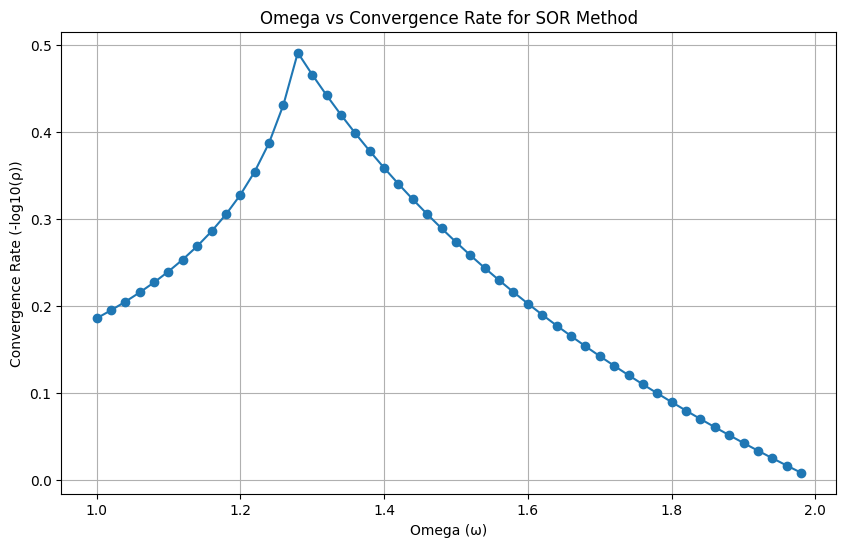

<Figure size 640x480 with 0 Axes>

In [23]:
import matplotlib.pyplot as plt
figsize = (10, 6)
plt.figure(figsize=figsize)
plt.plot(omega_values, convergence_rates, marker='o')
plt.title('Omega vs Convergence Rate for SOR Method')
plt.xlabel('Omega (ω)')
plt.ylabel('Convergence Rate (-log10(ρ))')
plt.grid()
plt.show()
plt.savefig('omega_vs_convergence_rate.png')